# import required module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import tensorflow as tf1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
import warnings
from sklearn import decomposition
warnings.filterwarnings('ignore')

# Load data-set

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/Dataset/MTP/All_Activity.csv")
df

Time_stamp_sec         1         2         3         4         5  \
0       7.152557e-07  0.012162  0.005372  0.005689  0.006941  0.013136   
1       4.227595e-01  0.019417  0.004365  0.017467  0.012783  0.005486   
2       7.368343e-01  0.002404  0.013390  0.011502  0.010158  0.003352   
3       9.805675e-01  0.010619  0.015050  0.018699  0.000319  0.011122   
4       1.215650e+00  0.006574  0.007201  0.004724  0.001101  0.009369   
...              ...       ...       ...       ...       ...       ...   
2196    3.565157e+02  0.300294  0.166791  0.155930  0.024595  0.063003   
2197    3.572718e+02  0.222309  0.209594  0.209616  0.154318  0.239492   
2198    3.579822e+02  0.138792  0.216504  0.713957  0.384248  0.227561   
2199    3.587376e+02  0.241029  0.181942  0.236581  0.113624  0.205489   
2200    3.594948e+02  0.051880  0.248920  0.195581  0.114890  0.095906   

             6         7         8         9  ...        96        97  \
0     0.013164  0.015125  0.003927  0.011982  ... -1.431029  1.658715   
1     0.005640  0.002650  0.005744  0.002402  ...  2.632000 -2.480699   
2     0.009591  0.002527  0.019817  0.005339  ... -2.106238  2.369294   
3     0.007625  0.011456  0.020549  0.002775  ...  1.775891 -1.555613   
4     0.004236  0.011648  0.011491  0.006268  ... -0.565492  0.493544   
...        ...       ...       ...       ...  ...       ...       ...   
2196  0.073611  0.245571  0.103749  0.054041  ...  1.565846  0.997995   
2197  0.293416  0.129744  0.316540  0.252837  ...  2.341387  2.811029   
2198  0.076942  0.409022  0.030229  0.316751  ... -2.378767 -2.427357   
2199  0.291535  0.390994  0.173994  0.329688  ... -2.383065  0.677491   
2200  0.053559  0.046083  0.056395  0.037836  ...  0.851325  1.056112   

            98        99       100       101       102       103       104  \
0    -2.660998  2.919511  2.608629 -2.768291  0.670073 -3.005982 -0.881872   
1    -2.531461  2.562904 -2.713858 -2.149658 -1.692947 -1.016725  3.072117   
2     1.416724  0.993940  2.527769 -2.504044  1.013208 -2.877881 -3.029874   
3    -2.156544  0.383077  2.957304  1.570796 -2.965438  2.408399  3.080692   
4    -0.448955 -0.214734 -0.395782 -0.261944 -1.993352 -1.846545 -0.208426   
...        ...       ...       ...       ...       ...       ...       ...   
2196  1.061936  1.088682  1.215235  0.899895  0.958297  1.173681  1.123351   
2197  1.826611  0.580882  0.693593  0.236914  0.715073 -2.321794  0.828111   
2198 -2.389044 -2.470082 -2.409881 -2.558775  0.674806  0.868363 -0.782270   
2199  0.826752 -2.245926  2.856896 -0.948657  2.320912  2.331203 -0.846382   
2200  0.955403  0.579894  0.768808  0.839568  1.155797  1.163397  0.827491   

         Activity  
0         Walking  
1         Walking  
2         Walking  
3         Walking  
4         Walking  
...           ...  
2196  No_Activity  
2197  No_Activity  
2198  No_Activity  
2199  No_Activity  
2200  No_Activity  

[2201 rows x 106 columns]

# Visualization of dataset

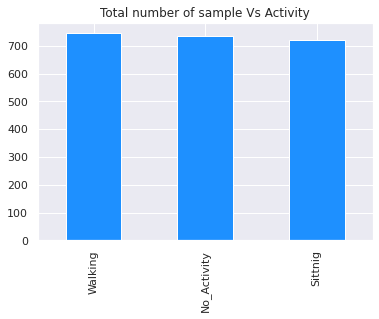

In [ ]:
sns.set(color_codes=True)
df['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


## Analysis of Walking activity

In [ ]:
w_amp=df.iloc[:745,1:53].values
Walking_ts=df.iloc[:745,0]
# w_amp

(745, 3)
(745,)


Text(0, 0.5, 'Amplitudes')

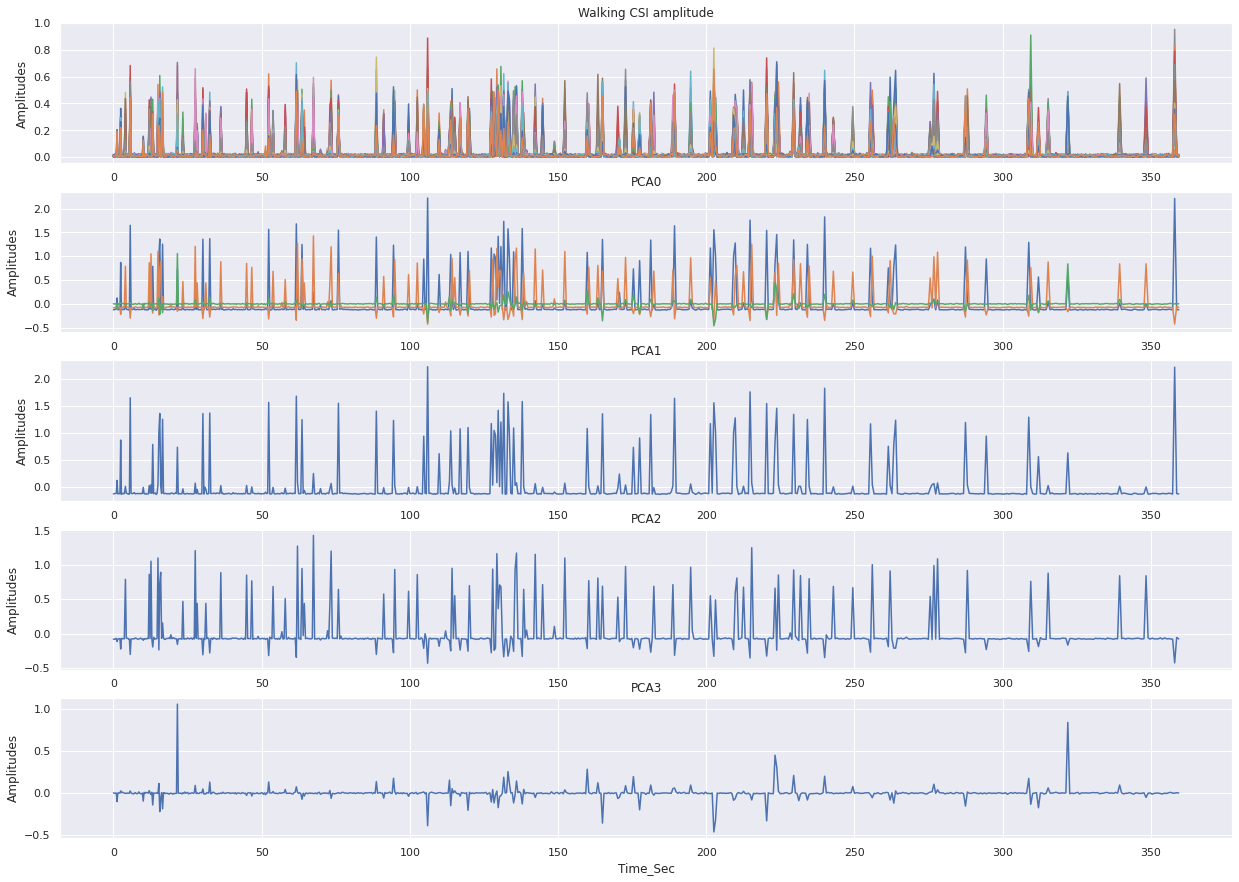

In [ ]:
pca = decomposition.PCA(n_components=3)
walking_pca = pca.fit_transform(w_amp)

print(walking_pca.shape)
print(walking_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(Walking_ts,w_amp)
plt.title("Walking CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(Walking_ts,walking_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(Walking_ts, walking_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(Walking_ts, walking_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(Walking_ts, walking_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("Walking_PCA_mag.png")

## Analysis of Sitting activity

In [ ]:
Sitting_amp=df.iloc[745:1466,1:53].values
Sitting_ts=df.iloc[745:1466,0]
# Sitting_amp

Text(0, 0.5, 'Amplitudes')

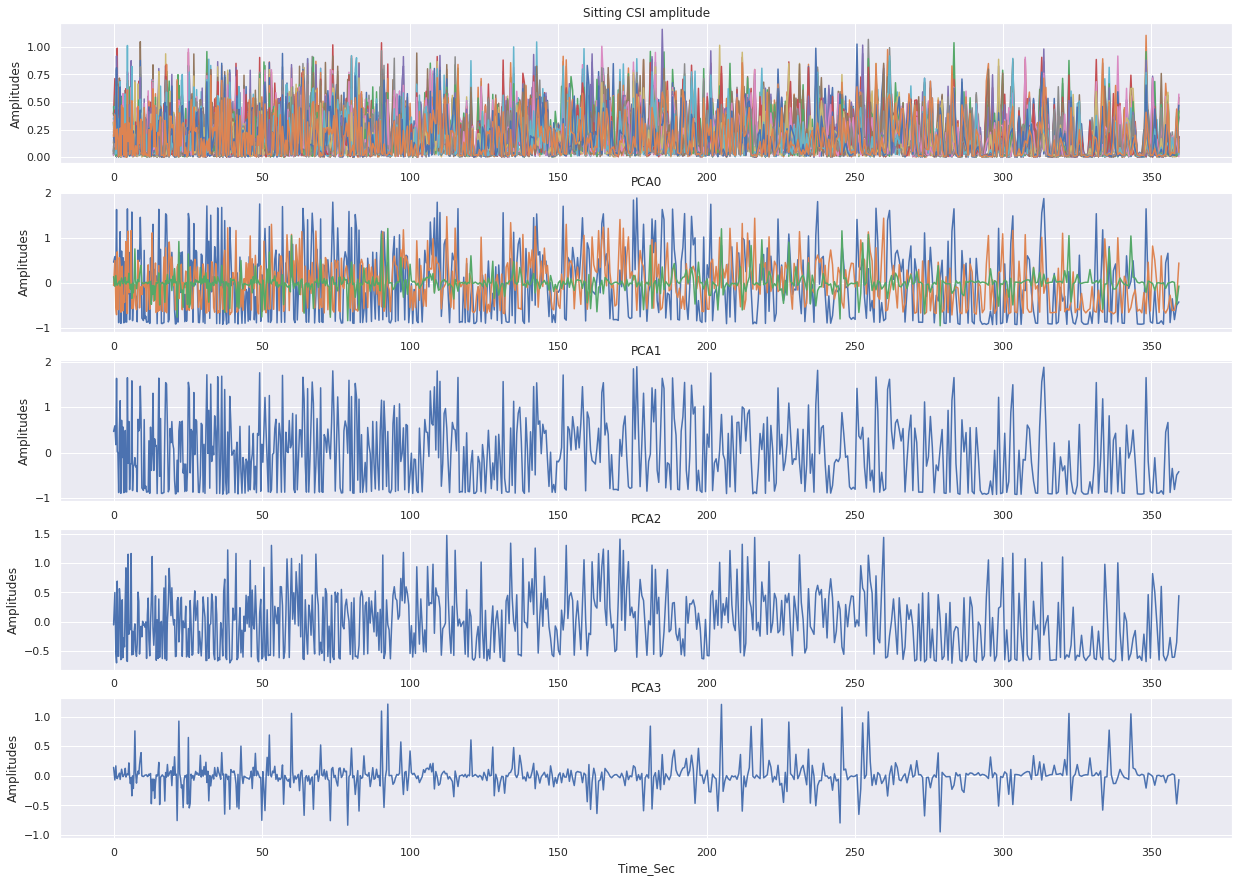

In [ ]:
Sitting_pca = pca.fit_transform(Sitting_amp)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(Sitting_ts,Sitting_amp)
plt.title("Sitting CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(Sitting_ts,Sitting_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(Sitting_ts, Sitting_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(Sitting_ts, Sitting_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(Sitting_ts, Sitting_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("Sitting_PCA_mag.png")

## Analysis of No_Person activity

In [ ]:
NP_amp=df.iloc[1466:,1:53].values
NP_ts=df.iloc[1466:,0]
# NP_amp

Text(0, 0.5, 'Amplitudes')

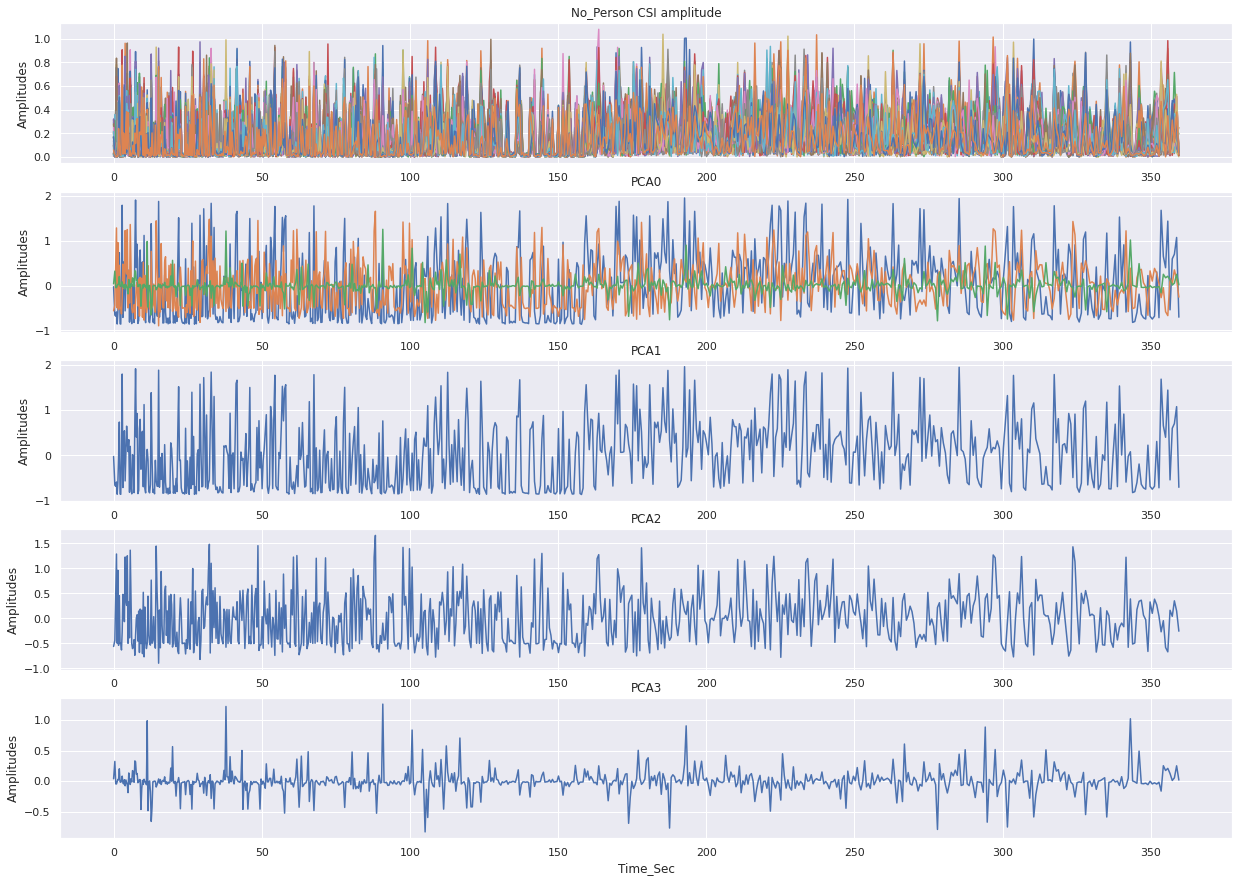

In [ ]:
NP_pca = pca.fit_transform(NP_amp)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(NP_ts,NP_amp)
plt.title("No_Person CSI amplitude")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(NP_ts,NP_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(NP_ts, NP_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(NP_ts, NP_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(NP_ts, NP_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')
# fig.savefig("NP_PCA_mag.png")


## Analysis of All activity

In [ ]:
dataset_amp=df.iloc[:,1:53].values
dataset_phs=df.iloc[:,53:-1].values

dataset_labels=df.iloc[:,-1]
Time_stamp=df.iloc[:,0]
# dataset_amp
# dataset_phs
# dataset_labels
# Time_stamp

Text(0, 0.5, 'Amplitudes')

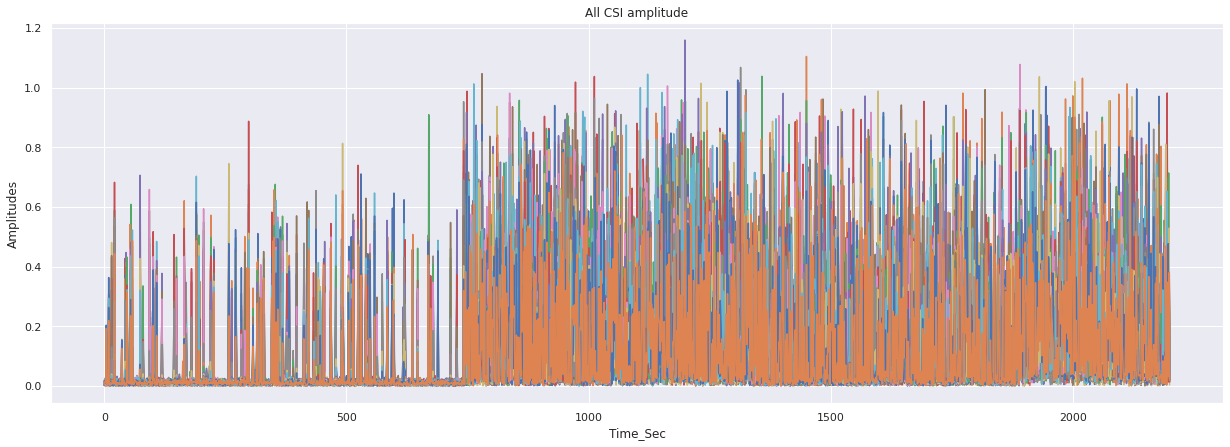

In [ ]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_amp)
plt.title("All CSI amplitude")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')


Text(0.5, 1.0, 'All CSI amplitude Spectrogram')

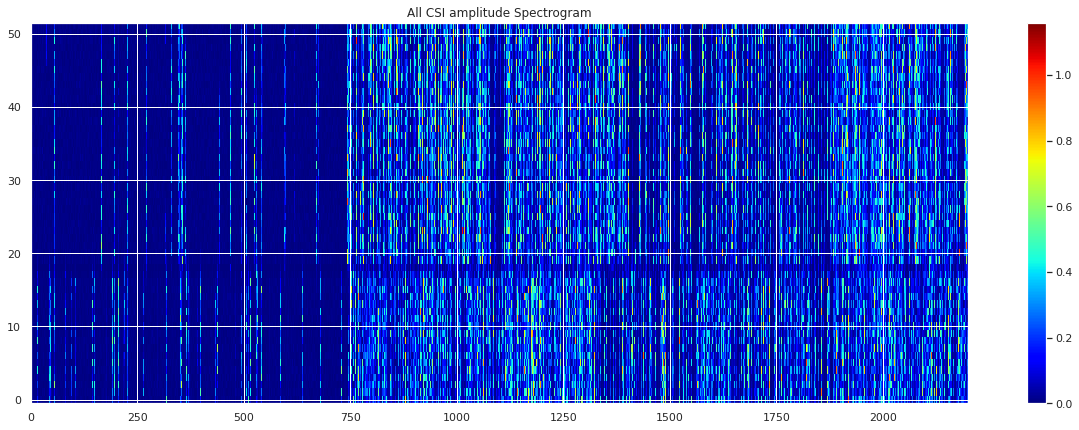

In [ ]:
fig = plt.figure(figsize = (21, 7))
im = plt.imshow((dataset_amp).T,interpolation = "nearest", aspect = "auto", cmap="jet", origin='lower')
plt.colorbar()
plt.title("All CSI amplitude Spectrogram")

Text(0, 0.5, 'Amplitudes')

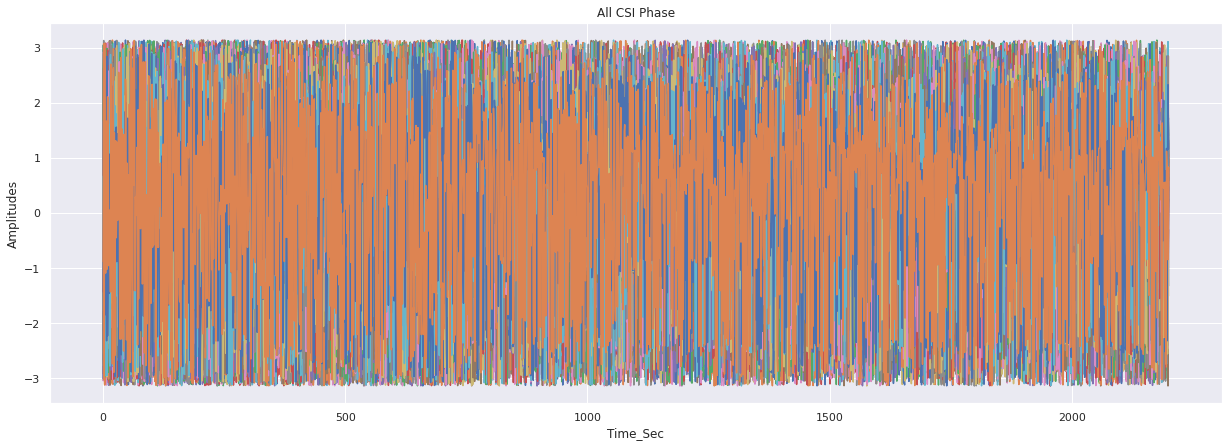

In [ ]:
fig = plt.figure(figsize = (21, 7))
plt.plot(dataset_phs)
plt.title("All CSI Phase")
plt.xlabel('Time_Sec')
plt.ylabel('Amplitudes')

# PCA for Dimensionality and Noise redution

## Amplitude Noise reduction using PCA

(2201, 3)
(2201,)


Text(0, 0.5, 'Amplitudes')

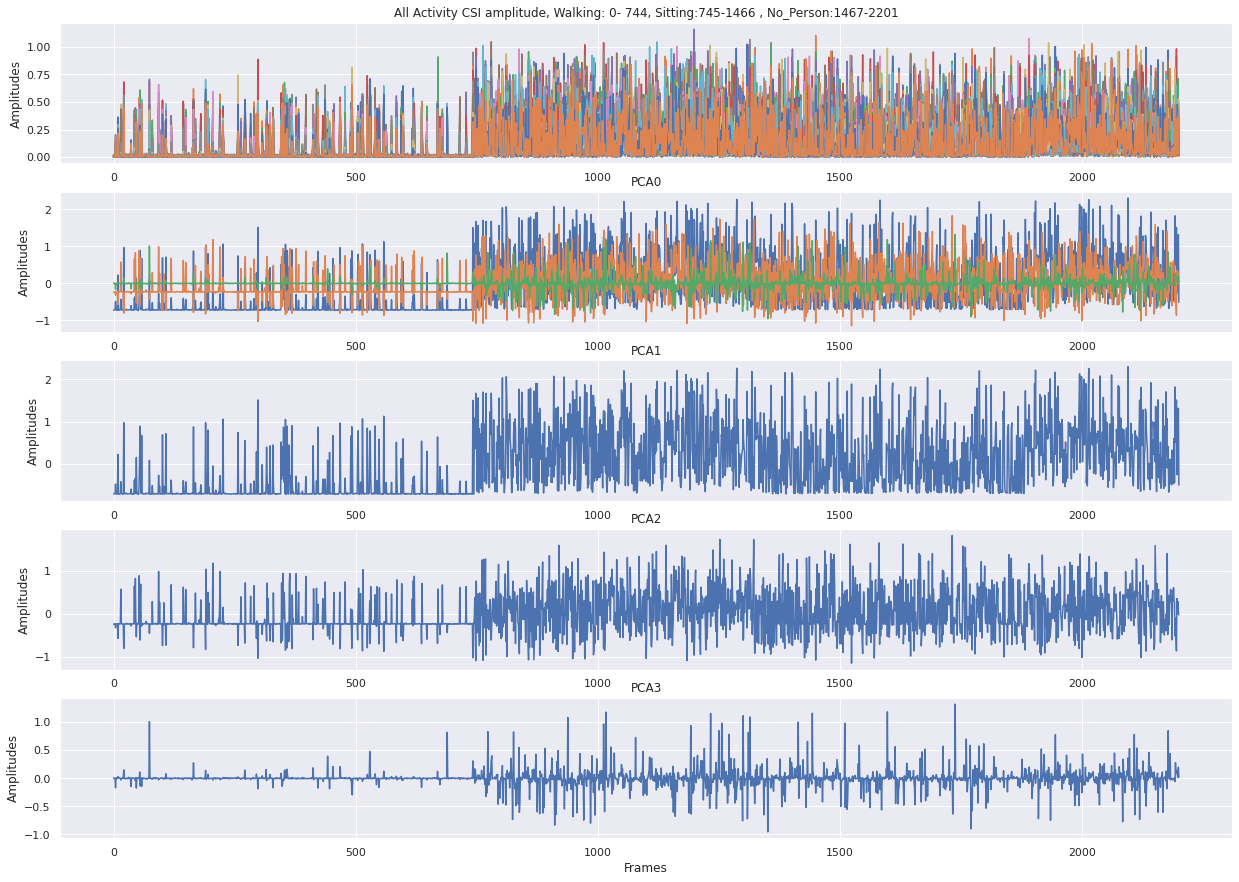

In [ ]:

pca = decomposition.PCA(n_components=3)
amp_pca = pca.fit_transform(dataset_amp)

print(amp_pca.shape)
print(amp_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax = plt.subplot(511)
plt.plot(dataset_amp)
plt.title("All Activity CSI amplitude, Walking: 0- 744, Sitting:745-1466 , No_Person:1467-2201")
plt.ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(amp_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(amp_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(amp_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(amp_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')
# fig.savefig("All_PCA_mag.png")


## Phase Noise reduction using PCA

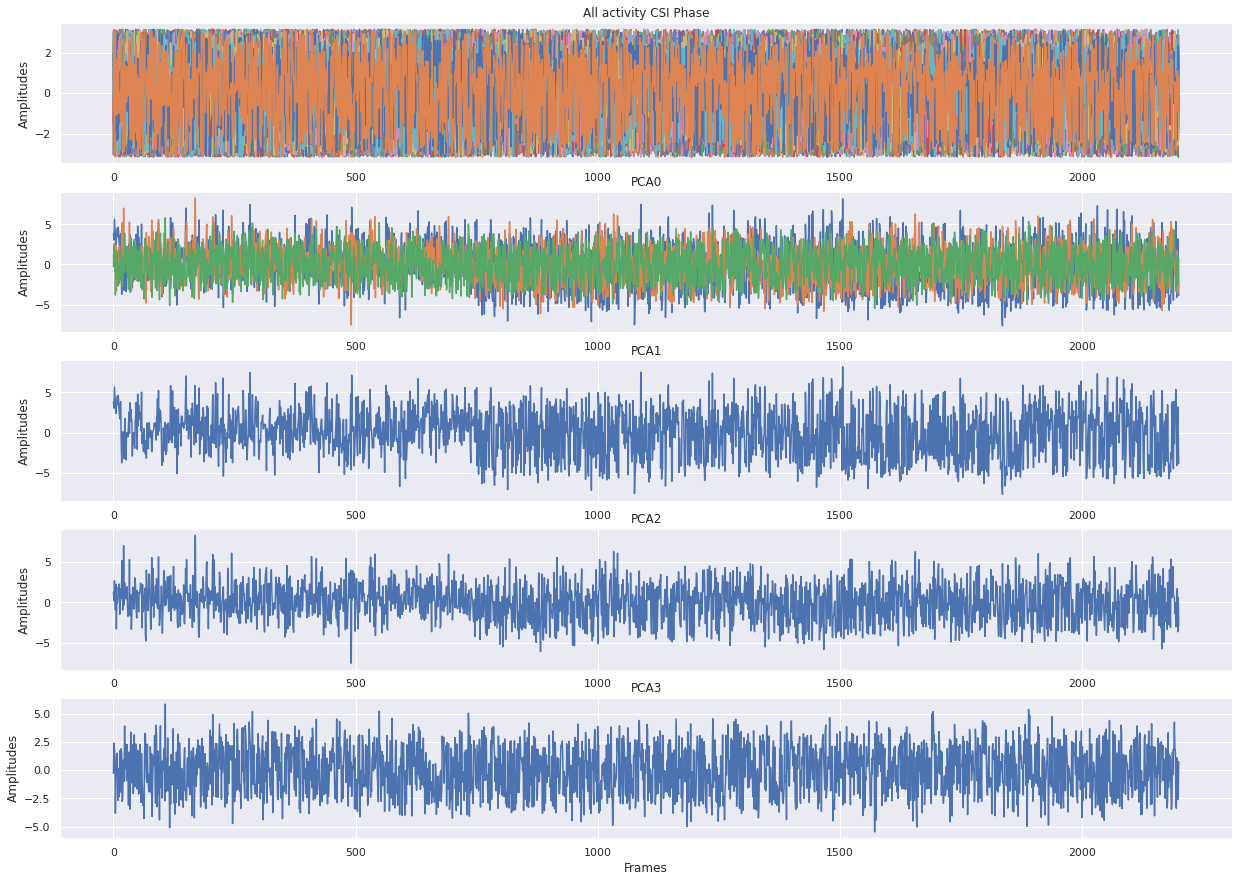

In [ ]:


pca = decomposition.PCA(n_components=3)
phase_pca = pca.fit_transform(dataset_phs)

# print(phase_pca.shape)
# print(phase_pca.T[0].shape)

fig = plt.figure(figsize = (21, 15))
ax1 = fig.add_subplot(511)
plt.plot(dataset_phs)
# annotation_line(ax=ax1, text='Walking', xmin=1, xmax=745, y=70, ytext=62, linewidth=1, linecolor='black', fontsize=14)


ax1.set_title("All activity CSI Phase")
ax1.set_ylabel('Amplitudes')

ax1 = plt.subplot(512)
plt.plot(phase_pca)
ax1.set_title("PCA0")
plt.ylabel('Amplitudes')

ax2 = plt.subplot(513)
plt.plot(phase_pca.T[0])
ax2.set_title("PCA1")
plt.ylabel('Amplitudes')

ax3 = plt.subplot(514)
plt.plot(phase_pca.T[1])
ax3.set_title("PCA2")
plt.ylabel('Amplitudes')

ax4 = plt.subplot(515)
plt.plot(phase_pca.T[2])
ax4.set_title("PCA3")
plt.xlabel('Frames')
plt.ylabel('Amplitudes')


plt.show()


## Extract PC1 of amp and Phase to make dataset

In [ ]:
amp_df=pd.DataFrame(amp_pca.T[0], columns=["PC1_amp"])
amp_df

PC1_amp
0    -0.723190
1    -0.715935
2    -0.711068
3    -0.709781
4    -0.482959
...        ...
2196 -0.265868
2197  0.825568
2198  0.998762
2199  1.316721
2200 -0.509440

[2201 rows x 1 columns]

In [ ]:
phs_df=pd.DataFrame(phase_pca.T[0], columns=["PC1_phs"])
phs_df

PC1_phs
0     3.772580
1     3.047484
2     5.667302
3     4.556497
4     3.577073
...        ...
2196 -4.086385
2197  0.500081
2198  3.182037
2199 -0.044860
2200 -3.831538

[2201 rows x 1 columns]

In [ ]:
amp_phs_df = pd.concat([amp_df, phs_df, df[['Activity']]], axis = 1)
amp_phs_df

PC1_amp   PC1_phs     Activity
0    -0.723190  3.772580      Walking
1    -0.715935  3.047484      Walking
2    -0.711068  5.667302      Walking
3    -0.709781  4.556497      Walking
4    -0.482959  3.577073      Walking
...        ...       ...          ...
2196 -0.265868 -4.086385  No_Activity
2197  0.825568  0.500081  No_Activity
2198  0.998762  3.182037  No_Activity
2199  1.316721 -0.044860  No_Activity
2200 -0.509440 -3.831538  No_Activity

[2201 rows x 3 columns]

In [ ]:
# amp_phs_df.to_csv("/home/ranjit/python_uhd_install/Dataset_Preparation/PCA_amp_phs.csv")

# DWT for Noise reduction and features extraction

## Required function

In [ ]:
def madev(d,axis=None): # Mean absolute deviation of a signal
    return np.mean(np.absolute(d-np.mean(d,axis)),axis)


def wavelet_denoising(x, wavelet='db4', level=6):                                   
    coeff = pywt.wavedec(x, wavelet, mode="symmetric") #symmetric, per, zero, constant, reflect, smooth,
#     print(np.array(coeff)[0].shape)
    sigma = (1/0.6745) * madev(coeff[0][1])
    
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='symmetric')



def annotation_line( ax, xmin, xmax, y, text, ytext=0, linecolor='black', linewidth=1, fontsize=12 ):

    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data', annotation_clip=False,
            arrowprops={'arrowstyle': '|-|', 'color':linecolor, 'linewidth':linewidth})
    
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data', annotation_clip=False,
            arrowprops={'arrowstyle': '<->', 'color':linecolor, 'linewidth':linewidth})

    xcenter = xmin + (xmax-xmin)/2
    if ytext == 0:
        ytext = y + ( ax.get_ylim()[1] - ax.get_ylim()[0] ) / 20

    ax.annotate(text, xy=(xcenter,ytext), ha='center', va='center', fontsize=fontsize, annotation_clip=False)

    
    
'''
def DWT_noise(vals, th=10):
    threshold = th # Threshold for filtering

    data = vals.copy() 
    # print("data: ", data.shape)

    w = pywt.Wavelet('sym5')
    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)
    # print("maximum level is " + str(maxlev))
    
    # Decompose into wavelet components, to the level selected:
    coeffs = pywt.wavedec(data, 'sym5', level=maxlev)
    
    
    #plt.figure()
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    datarec = pywt.waverec(coeffs, 'sym5')
    return datarec

'''


'\ndef DWT_noise(vals, th=10):\n    threshold = th # Threshold for filtering\n\n    data = vals.copy() \n    # print("data: ", data.shape)\n\n    w = pywt.Wavelet(\'sym5\')\n    maxlev = pywt.dwt_max_level(data.shape[1], w.dec_len)\n    # print("maximum level is " + str(maxlev))\n    \n    # Decompose into wavelet components, to the level selected:\n    coeffs = pywt.wavedec(data, \'sym5\', level=maxlev)\n    \n    \n    #plt.figure()\n    for i in range(1, len(coeffs)):\n        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))\n    datarec = pywt.waverec(coeffs, \'sym5\')\n    return datarec\n\n'

Text(0.5, 1.0, 'DWT Noise removal')

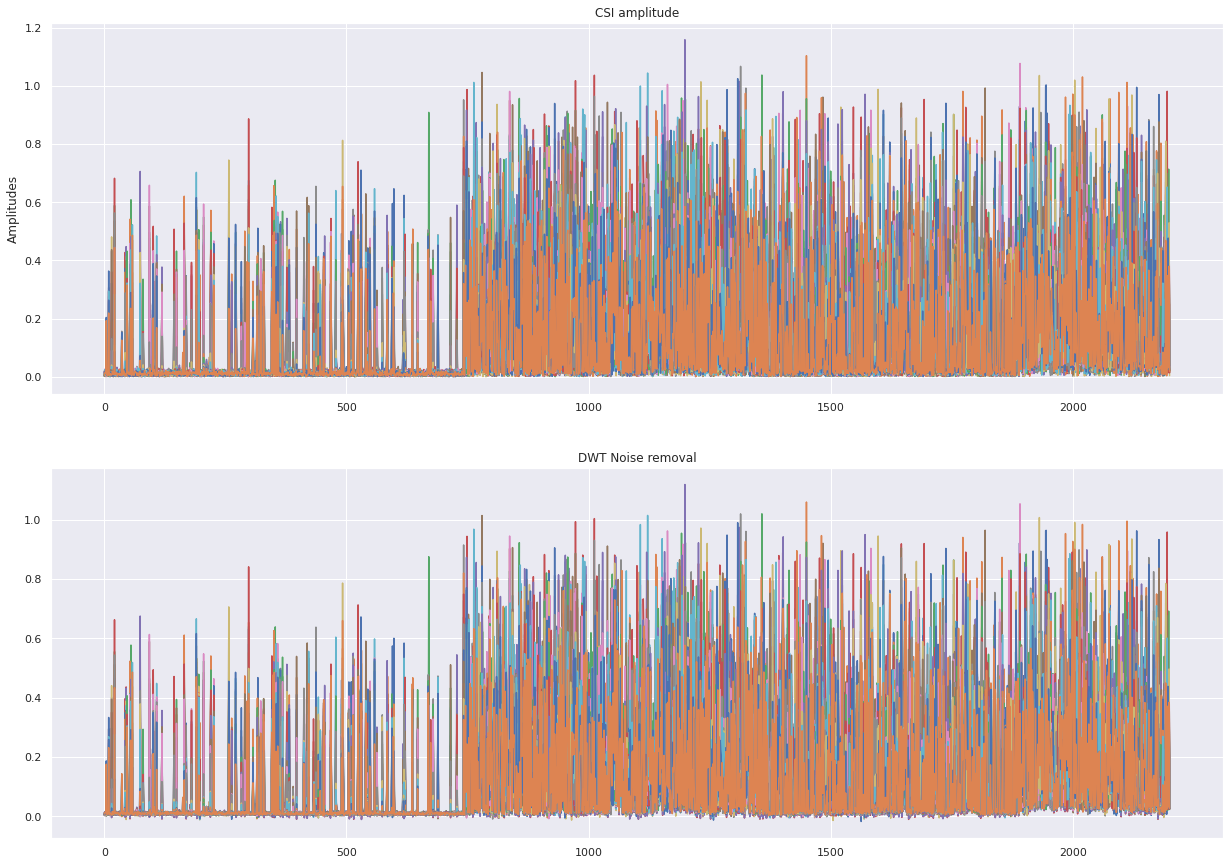

In [ ]:
fig = plt.figure(figsize = (21, 15))

ax = plt.subplot(211)
plt.plot(dataset_amp)
plt.title("CSI amplitude")
plt.ylabel('Amplitudes')

ax = plt.subplot(212)
amp1_with_dwt = wavelet_denoising(dataset_amp)
plt.plot(amp1_with_dwt)
plt.title("DWT Noise removal")

## Dimensionality Reduction using PCA

### Mathematically the main objective of PCA is to:
1. Find an orthonormal basis for the data.
2. Sort dimensions in the order of importance.
3. Discard the low significance dimensions.
4. Focus on uncorrelated and Gaussian components.

### Steps involved in PCA
1. Standardize the PCA.
2. Calculate the covariance matrix.
3. Find the eigenvalues and eigenvectors for the covariance matrix.
4. Plot the vectors on the scaled data.

## Amplitude Dimensionality Reduction using PCA

##  1. Standardizing the features

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_features_amp = StandardScaler().fit_transform(amp_pca)


In [ ]:
# fig = plt.figure(figsize = (21, 7))
# plt.plot(x)

# PCA Projection to 2D

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents_amp = pca.fit_transform(std_features_amp)
principalDf_amp = pd.DataFrame(data = principalComponents_amp
             , columns = ['PC_amp1', 'PC_amp2'])

principalDf_amp

PC_amp1   PC_amp2
0     0.430388 -0.221454
1     0.416758 -0.257973
2     0.420620 -0.208856
3     0.407719 -0.231428
4     0.134665 -1.139036
...        ...       ...
2196 -0.304727  0.971487
2197  0.112392  0.275121
2198 -0.483814  0.346795
2199  0.486323  0.973850
2200  0.077333  0.048566

[2201 rows x 2 columns]

## Phase Dimensionality Reduction using PCA

In [ ]:
std_features_phs = StandardScaler().fit_transform(phase_pca)

# PCA Projection to 2D
principalComponents_phs = pca.fit_transform(std_features_phs)
principalDf_phs = pd.DataFrame(data = principalComponents_phs
             , columns = ['PC_phs1', 'PC_phs2'])

principalDf_phs

PC_phs1   PC_phs2
0     1.269876  0.535781
1     1.025804  0.076242
2     1.907653  1.130082
3     1.533748  0.263226
4     1.204067 -0.405060
...        ...       ...
2196 -1.375505 -0.200834
2197  0.168331  0.714823
2198  1.071095 -1.548604
2199 -0.015100  0.253963
2200 -1.289722 -1.244214

[2201 rows x 2 columns]

In [ ]:
finalDf = pd.concat([principalDf_amp, principalDf_phs, df[['Activity']]], axis = 1)
finalDf

PC_amp1   PC_amp2   PC_phs1   PC_phs2     Activity
0     0.430388 -0.221454  1.269876  0.535781      Walking
1     0.416758 -0.257973  1.025804  0.076242      Walking
2     0.420620 -0.208856  1.907653  1.130082      Walking
3     0.407719 -0.231428  1.533748  0.263226      Walking
4     0.134665 -1.139036  1.204067 -0.405060      Walking
...        ...       ...       ...       ...          ...
2196 -0.304727  0.971487 -1.375505 -0.200834  No_Activity
2197  0.112392  0.275121  0.168331  0.714823  No_Activity
2198 -0.483814  0.346795  1.071095 -1.548604  No_Activity
2199  0.486323  0.973850 -0.015100  0.253963  No_Activity
2200  0.077333  0.048566 -1.289722 -1.244214  No_Activity

[2201 rows x 5 columns]

In [ ]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('PC1', fontsize = 15)
# ax.set_ylabel('PC2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# Activity = ['Sitting', 'Walking', 'No_Person']
# colors = ['r', 'g', 'b']
# for Activity, color in zip(Activity,colors):
#     indicesToKeep = finalDf['Activity'] == Activity
#     ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
#                , finalDf.loc[indicesToKeep, 'PC2']
#                , c = color
#                , s = 50)
# ax.legend(Activity)
# ax.grid()

# Data Preprocessing

In [ ]:
from scipy import stats

num_time_steps = 1
num_features=2
step = 1
segments = []
labels = []
for i in range(0, len(df) - num_time_steps, step):
    S0 = amp_phs_df['PC1_amp'].values[i: i + num_time_steps]
    S1 = amp_phs_df['PC1_phs'].values[i: i + num_time_steps]
#     S2 = finalDf['PC_phs1'].values[i: i + num_time_steps]
#     S3 = finalDf['PC_phs2'].values[i: i + num_time_steps]
    
    
#     S4 = df['S4'].values[i: i + num_time_steps]
#     S5 = df['S5'].values[i: i + num_time_steps]
#     S6 = df['S6'].values[i: i + num_time_steps]
#     S7 = df['S7'].values[i: i + num_time_steps]
#     S8 = df['S8'].values[i: i + num_time_steps]
#     S9 = df['S9'].values[i: i + num_time_steps]
    
    
    
    label = stats.mode(df['Activity'][i: i + num_time_steps])[0][0]
#     segments.append([S0,S1,S2,S3,S4,S5,S6,S7,S8,S9])
    segments.append([S0,S1])

    
    labels.append(label)

In [ ]:
np.array(segments).shape

(2200, 2, 1)

# Transfering shape of segment

In [ ]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, num_time_steps, num_features)


# One-Hot encoding on label (Walking, Sitting, ....)

In [ ]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
# labels
reshaped_segments.shape


(2200, 1, 2)

# Split the dataset into training (70%) and testing (30%)

In [ ]:
CSI_Amp=amp_phs_df.iloc[:,:-1].values
Activity=amp_phs_df.iloc[:,-1].values


In [ ]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train,X_test,Y_train,Y_test=train_test_split(CSI_Amp,Activity,test_size=0.20,random_state=RANDOM_SEED)
# X_train, X_test, Y_train, Y_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)


In [ ]:
len(X_train)
X_train[0]

array([0.22840151, 0.06309254])

In [ ]:
len(X_test)
X_test.shape

(441, 2)

In [ ]:
# Features scaling (optional): in order to improve the performance

# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

## K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits=k , shuffle=True, random_state=42)

# Apply ML Model: 
1. KNN
2. SVM
3. Decision Tree
4. Random Forest
5. XGBoost
6. RNN- LSTM

# 1. KNN

KNN Hyperparameters tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

weights=['uniform','distance' ]
n_neighbors = list(range(1,3)) # 30
leaf_size = list(range(1,5)) # 50
algorithm=['auto', 'ball_tree'] # , 'kd_tree', 'brute'
p=[1,2]
metric=['minkowski']
KNN_param=dict(weights=weights, n_neighbors=n_neighbors, leaf_size=leaf_size, algorithm=algorithm, p=p, metric=metric)

# metric: str or callable, default=’minkowski’
# metric_params: dict, default=None

model_KNN=KNeighborsClassifier()

clf_KNN=GridSearchCV(model_KNN, KNN_param, cv=kf, return_train_score=False, refit = True, verbose = 3)

clf_KNN.fit(X_train,Y_train)



Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV 1/10] END algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.653 total time=   0.0s
[CV 2/10] END algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/10] END algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.608 total time=   0.0s
[CV 4/10] END algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.597 total time=   0.0s
[CV 5/10] END algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.534 total time=   0.0s
[CV 6/10] END algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.534 total time=   0.0s
[CV 7/10] END algorithm=auto, leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.551 total time=   0.0s
[CV 8/10] END algorithm=aut

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'leaf_size': [1, 2, 3, 4], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
print(f"Accuracy with SVM: {clf_KNN.best_score_}")

Accuracy with SVM: 0.5948863636363637


## K - Fold cross validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
kf_KNN=cross_val_score(model_KNN,X_train, Y_train,cv=kf ,scoring='accuracy')

# Score of K-fold cross validation

kf_KNN.mean()

0.6130681818181818

## Accuracy -- KNN

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred_KNN=clf_KNN.predict(X_test)
accuracy_score(Y_test,Y_pred_KNN)


0.6099773242630385

## Confusion Matrix -- KNN 

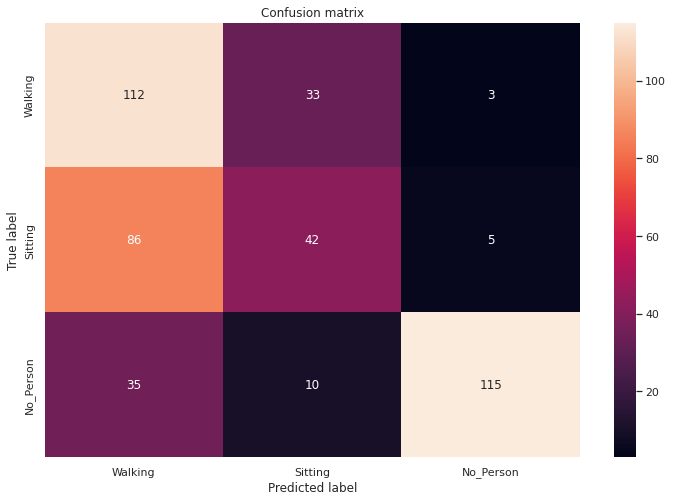

In [ ]:
from sklearn.metrics import confusion_matrix

LABELS = ['Walking','Sitting','No_Person']

confusion_matrix_KNN = confusion_matrix(Y_test, Y_pred_KNN)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_KNN, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 2. Support Vector Machine (SVM)

## Hyper Parameter Tuning -- SVM Classifier

In [ ]:
from sklearn.svm import SVC

SVM_param={'C': [0.1, 1, 10, 100, 1000],
           'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
           'kernel':['rbf','linear']
           }

# refit = True, verbose = 3

model_SVM=SVC()

clf_SVM=GridSearchCV(model_SVM, SVM_param, cv=kf, return_train_score=False, refit = True, verbose = 3)

clf_SVM.fit(X_train,Y_train)



Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.1s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.1s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=   0.1s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.597 total time=   0.1s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.1s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.1s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.1s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.597 total time=   0.1s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.1s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.653 total time=   0.1s
[CV 1/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.648 total time=   0.1s
[CV 2/10] END ....C=0.1, gamma=1, kernel=linea

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [ ]:

print(f"Accuracy with SVM: {clf_SVM.best_score_}")


Accuracy with SVM: 0.6357954545454545


In [ ]:
# dir(clf)

In [ ]:
result_SVM=pd.DataFrame(clf_SVM.cv_results_)
# result_SVM
result_SVM[['param_C','param_gamma', 'param_kernel','rank_test_score','mean_test_score']]

param_C param_gamma param_kernel  rank_test_score  mean_test_score
0      0.1           1          rbf               15         0.623864
1      0.1           1       linear               17         0.620455
2      0.1         0.1          rbf               14         0.625000
3      0.1         0.1       linear               17         0.620455
4      0.1        0.01          rbf               45         0.570455
5      0.1        0.01       linear               17         0.620455
6      0.1       0.001          rbf               49         0.331250
7      0.1       0.001       linear               17         0.620455
8      0.1      0.0001          rbf               50         0.318750
9      0.1      0.0001       linear               17         0.620455
10       1           1          rbf               22         0.619318
11       1           1       linear               22         0.619318
12       1         0.1          rbf                4         0.634659
13       1         0.1       linear               22         0.619318
14       1        0.01          rbf               16         0.622159
15       1        0.01       linear               22         0.619318
16       1       0.001          rbf               46         0.567045
17       1       0.001       linear               22         0.619318
18       1      0.0001          rbf               48         0.331818
19       1      0.0001       linear               22         0.619318
20      10           1          rbf                6         0.630114
21      10           1       linear               28         0.618182
22      10         0.1          rbf                3         0.635227
23      10         0.1       linear               28         0.618182
24      10        0.01          rbf                1         0.635795
25      10        0.01       linear               28         0.618182
26      10       0.001          rbf               43         0.615341
27      10       0.001       linear               28         0.618182
28      10      0.0001          rbf               47         0.557386
29      10      0.0001       linear               28         0.618182
30     100           1          rbf                5         0.631818
31     100           1       linear               33         0.617614
32     100         0.1          rbf               13         0.625568
33     100         0.1       linear               33         0.617614
34     100        0.01          rbf                1         0.635795
35     100        0.01       linear               33         0.617614
36     100       0.001          rbf                9         0.628409
37     100       0.001       linear               33         0.617614
38     100      0.0001          rbf               44         0.609091
39     100      0.0001       linear               33         0.617614
40    1000           1          rbf                8         0.629545
41    1000           1       linear               38         0.617614
42    1000         0.1          rbf               12         0.626136
43    1000         0.1       linear               38         0.617614
44    1000        0.01          rbf               10         0.628409
45    1000        0.01       linear               38         0.617614
46    1000       0.001          rbf                6         0.630114
47    1000       0.001       linear               38         0.617614
48    1000      0.0001          rbf               11         0.626136
49    1000      0.0001       linear               38         0.617614

In [ ]:

model_SVM=SVC(kernel='rbf',C=10,gamma=0.01)
model_SVM.fit(X_train,Y_train)

Y_pred_SVM=model_SVM.predict(X_test)
SVM_acc=model_SVM.score(X_test, Y_test)
print(f"SVM_accuracy: {SVM_acc*100} %")


SVM_accuracy: 62.131519274376416 %


## Score of K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
kf_SVM=cross_val_score(clf_SVM, X_train, Y_train,cv=kf ,scoring='accuracy')

print(f"SVM K-fold cross validation mean Score: {kf_SVM.mean()*100} %")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.1s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.1s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   0.1s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.623 total time=   0.1s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.728 total time=   0.1s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.595 total time=   0.1s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.557 total time=   0.1s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.1s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.1s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.1s
[CV 1/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.566 total time=   0.1s
[CV 2/10] END ....C=0.1, gamma=1, kernel=linea

## Confusion matrix -- SVM

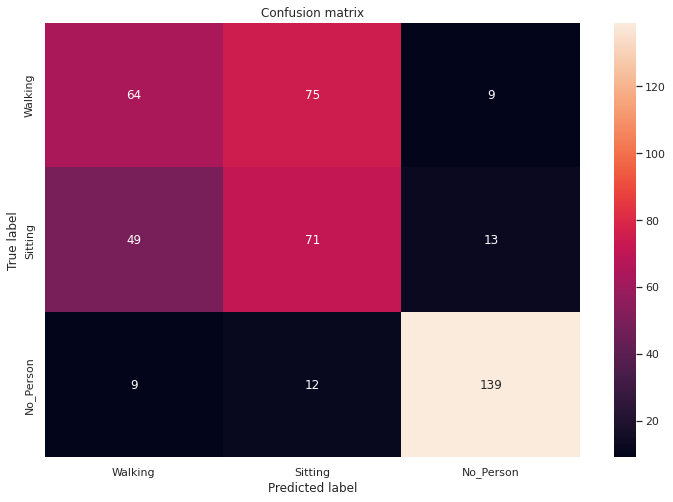

In [ ]:

confusion_matrix_SVM = confusion_matrix(Y_test, Y_pred_SVM)

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_SVM, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");

plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


DT_param = {"max_depth": [3, None],
            "criterion": ["gini", "entropy"],
            "splitter":['best', 'random'],
            "max_features": ['auto', 'sqrt', 'log2']
              }

# max_depth: int, default=None , min_samples_split: int or float, default=2, min_samples_leaf: int or float, default=1
# max_features: int, float or {“auto”, “sqrt”, “log2”}, default=None

model_DT=DecisionTreeClassifier()

DT_clf = GridSearchCV(model_DT, DT_param, cv = kf ,return_train_score=False, refit = True, verbose = 3)

DT_clf.fit(X_train, Y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=0.665 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=0.597 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=0.585 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=0.653 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=0.653 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=0.614 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=0.580 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=3, max_features=auto, splitter=best;, score=0.562 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=3, max_features=auto, spl

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [ ]:
result_DT=pd.DataFrame(DT_clf.cv_results_)
# result_DT

In [ ]:
result_DT[['param_criterion','param_splitter','param_max_features','rank_test_score','mean_test_score' ]]

param_criterion param_splitter param_max_features  rank_test_score  \
0             gini           best               auto                2   
1             gini         random               auto               22   
2             gini           best               sqrt                4   
3             gini         random               sqrt               24   
4             gini           best               log2               16   
5             gini         random               log2               23   
6             gini           best               auto               14   
7             gini         random               auto                9   
8             gini           best               sqrt                7   
9             gini         random               sqrt               13   
10            gini           best               log2               10   
11            gini         random               log2                7   
12         entropy           best               auto                5   
13         entropy         random               auto               21   
14         entropy           best               sqrt                1   
15         entropy         random               sqrt               20   
16         entropy           best               log2                3   
17         entropy         random               log2               19   
18         entropy           best               auto               18   
19         entropy         random               auto               12   
20         entropy           best               sqrt                6   
21         entropy         random               sqrt               11   
22         entropy           best               log2               15   
23         entropy         random               log2               17   

    mean_test_score  
0          0.614773  
1          0.473295  
2          0.608523  
3          0.458523  
4          0.588636  
5          0.472159  
6          0.596023  
7          0.601136  
8          0.602841  
9          0.596023  
10         0.600000  
11         0.602841  
12         0.607955  
13         0.524432  
14         0.617045  
15         0.525000  
16         0.611932  
17         0.529545  
18         0.580682  
19         0.598295  
20         0.605114  
21         0.598864  
22         0.592045  
23         0.581818

In [ ]:
DT_clf.best_score_

0.6170454545454545

In [ ]:
Y_pred_DT=DT_clf.predict(X_test)
DT_clf.score(X_test, Y_test)

0.5941043083900227

# 4. Random Forest

# 5. XGBoost

## Precision, Recall and F1 score

In [ ]:
from sklearn.metrics import precision_score , recall_score, f1_score

# Precision Score

# precision_score(Y_test,Y_pred_SVM)

# 6. Building the RNN model -- LSTM
This model contains 2 fully-connected and 2 LSTM layers (stacked on each other) with 64 units each:

In [ ]:
XR_train, XR_test, YR_train, YR_test = train_test_split(reshaped_segments, labels, test_size=0.3, random_state=RANDOM_SEED)


In [ ]:
num_classes = 3
num_hidden_layer = 64

In [ ]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf1.Variable(tf.random_normal([num_features, num_hidden_layer])),
        'output': tf1.Variable(tf.random_normal([num_hidden_layer, num_classes]))
    }
    biases = {
        'hidden': tf1.Variable(tf.random_normal([num_hidden_layer], mean=1.0)),
        'output': tf1.Variable(tf.random_normal([num_classes]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, num_features])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, num_time_steps, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.compat.v1.nn.rnn_cell.LSTMCell(num_hidden_layer, forget_bias=1.0) for _ in range(2)]
    
    lstm_layers = tf.keras.layers.StackedRNNCells(lstm_layers)


    outputs, _ = tf.compat.v1.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']


# Creating Placeholders:

In [ ]:
tf.compat.v1.reset_default_graph() # To clear default graph

X = tf.placeholder(tf.float32, [None, num_time_steps, num_features], name="input") # X values that must be feed using feed dict
Y = tf.placeholder(tf.float32, [None, num_classes]) # Y values that must be feed using feed dict

In [ ]:
pred_Y = create_LSTM_model(X)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [ ]:
L2_LOSS = 0.00025

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [ ]:
LEARNING_RATE = 0.00025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

# Training

In [ ]:
num_epochs=1000
BATCH_SIZE = 1024

In [ ]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(XR_train)

for i in range(1, num_epochs + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: XR_train[start:end],
                                       Y: YR_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: XR_train, Y: YR_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={ X: XR_test, Y: YR_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 100 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test*100}% loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: XR_test, Y: YR_test})

print()

print(f'final results: accuracy: {acc_final*100}% loss: {loss_final}')


epoch: 1 test accuracy: 30.000001192092896% loss: 1.253951072692871
epoch: 100 test accuracy: 62.42424249649048% loss: 0.7950506210327148
epoch: 200 test accuracy: 61.81818246841431% loss: 0.7742984294891357
epoch: 300 test accuracy: 61.51515245437622% loss: 0.763026237487793
epoch: 400 test accuracy: 62.87878751754761% loss: 0.7544856071472168
epoch: 500 test accuracy: 62.42424249649048% loss: 0.7504534721374512
epoch: 600 test accuracy: 63.63636255264282% loss: 0.7476166486740112
epoch: 700 test accuracy: 64.54545259475708% loss: 0.7470548152923584
epoch: 800 test accuracy: 65.3030276298523% loss: 0.7487045526504517
epoch: 900 test accuracy: 65.7575786113739% loss: 0.7536200881004333
epoch: 1000 test accuracy: 65.7575786113739% loss: 0.7551798820495605

final results: accuracy: 65.7575786113739% loss: 0.7551798820495605


In [ ]:
import pickle  # implements binary protocols for serializing and de-serializing a Python object structure

# history = pickle.load(open("history.p", "rb"))
# predictions = pickle.load(open("predictions.p", "rb"))


# Evaluation

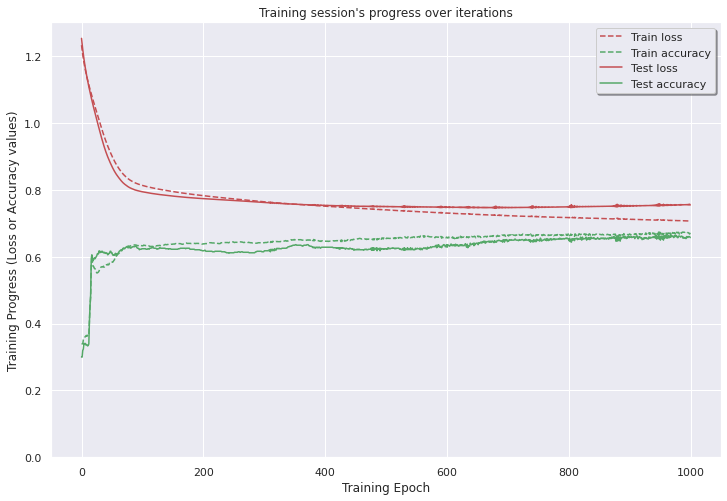

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

## Confusion matrix

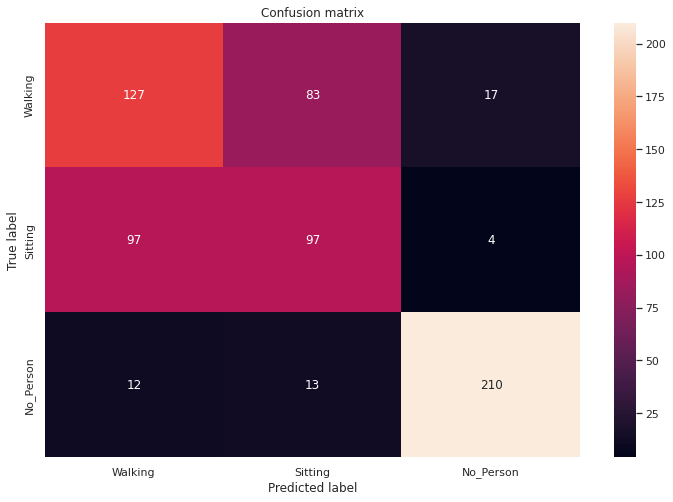

In [ ]:
from sklearn.metrics import confusion_matrix

max_test = np.argmax(YR_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

confusion_matrix = confusion_matrix(max_test, max_predictions)


plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()